In [1]:
N = 12
a = 5
r = 2 # <- We want to compute this
pow(a, r, N)

1

In [ ]:
#%%prun

import qiskit as qk
import math
from quantum.gates import CModularInplaceMultiplicationGate

n = math.ceil(math.log(N, 2))
x_reg = qk.circuit.QuantumRegister(1, "x")
b_reg = qk.circuit.QuantumRegister(n, "b")
ancilla_reg = qk.circuit.AncillaRegister(n+2, "a")
meas_reg = qk.circuit.ClassicalRegister(x_reg.size)
qc = qk.QuantumCircuit(x_reg, b_reg, ancilla_reg, meas_reg)
qc.h(x_reg)
qc.x(b_reg)

for bit in range(2*n):
    mult = CModularInplaceMultiplicationGate(a, N, n)
    qc.append(mult.get_native(), [x_reg[0]] + b_reg[:] + ancilla_reg[:])

qc.append(qk.circuit.library.QFTGate(x_reg.size).inverse(), x_reg)
qc.measure(x_reg, meas_reg)

CircuitError: 'The amount of qubit(11)/clbit(0) arguments does not match the gate expectation (12).'

In [24]:
qc.draw()

┌───┐                                                      »
   x: ┤ H ├────────■─────────────────■─────────────────■─────────»
      ├───┤┌───────┴────────┐┌───────┴────────┐┌───────┴────────┐»
 b_0: ┤ X ├┤0               ├┤0               ├┤0               ├»
      ├───┤│                ││                ││                │»
 b_1: ┤ X ├┤1               ├┤1               ├┤1               ├»
      ├───┤│                ││                ││                │»
 b_2: ┤ X ├┤2               ├┤2               ├┤2               ├»
      ├───┤│                ││                ││                │»
 b_3: ┤ X ├┤3               ├┤3               ├┤3               ├»
      └───┘│                ││                ││                │»
 a_0: ─────┤4               ├┤4               ├┤4               ├»
           │  U_a(5)MOD(12) ││  U_a(5)MOD(12) ││  U_a(5)MOD(12) │»
 a_1: ─────┤5               ├┤5               ├┤5               ├»
           │                ││                ││                │»
 a_2: ─────┤6               ├┤6               ├┤6               ├»
           │                ││                ││                │»
 a_3: ─────┤7               ├┤7               ├┤7               ├»
           │                ││                ││                │»
 a_4: ─────┤8               ├┤8               ├┤8               ├»
           │                ││                ││                │»
 a_5: ─────┤9               ├┤9               ├┤9               ├»
           └────────────────┘└────────────────┘└────────────────┘»
c2: 1/═══════════════════════════════════════════════════════════»
                                                                 »
«                                                                              »
«   x: ────────■─────────────────■─────────────────■─────────────────■─────────»
«      ┌───────┴────────┐┌───────┴────────┐┌───────┴────────┐┌───────┴────────┐»
« b_0: ┤0               ├┤0               ├┤0               ├┤0               ├»
«      │                ││                ││                ││                │»
« b_1: ┤1               ├┤1               ├┤1               ├┤1               ├»
«      │                ││                ││                ││                │»
« b_2: ┤2               ├┤2               ├┤2               ├┤2               ├»
«      │                ││                ││                ││                │»
« b_3: ┤3               ├┤3               ├┤3               ├┤3               ├»
«      │                ││                ││                ││                │»
« a_0: ┤4               ├┤4               ├┤4               ├┤4               ├»
«      │  U_a(5)MOD(12) ││  U_a(5)MOD(12) ││  U_a(5)MOD(12) ││  U_a(5)MOD(12) │»
« a_1: ┤5               ├┤5               ├┤5               ├┤5               ├»
«      │                ││                ││                ││                │»
« a_2: ┤6               ├┤6               ├┤6               ├┤6               ├»
«      │                ││                ││                ││                │»
« a_3: ┤7               ├┤7               ├┤7               ├┤7               ├»
«      │                ││                ││                ││                │»
« a_4: ┤8               ├┤8               ├┤8               ├┤8               ├»
«      │                ││                ││                ││                │»
« a_5: ┤9               ├┤9               ├┤9               ├┤9               ├»
«      └────────────────┘└────────────────┘└────────────────┘└────────────────┘»
«c2: 1/════════════════════════════════════════════════════════════════════════»
«                                                                              »
«                        ┌────────┐┌─┐
«   x: ────────■─────────┤ qft_dg ├┤M├
«      ┌───────┴────────┐└────────┘└╥┘
« b_0: ┤0               ├───────────╫─
«      │                │           ║ 
« b_1: ┤1               ├───────────╫─
«      │                │           ║ 
« b_2: ┤2               ├────────

In [25]:
import qiskit_aer as qk_aer

simulator = qk_aer.AerSimulator()
qct = qk.transpile(qc, backend=simulator)
outcomes = (
    simulator.run(qct, memory=False).result().get_counts().int_outcomes()
)

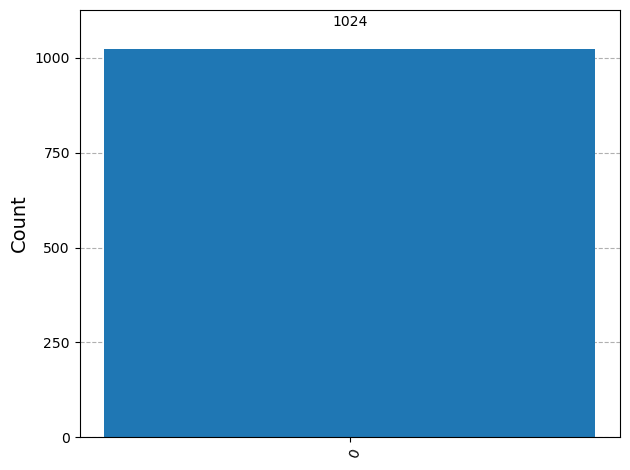

In [26]:
qk.visualization.plot_histogram(outcomes)